In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

## Create Dataset

In [3]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

## Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Create a Dummy Model with default 0 as output

In [5]:
dummy_model_probability = [0 for _ in range(len(y_test))]

## Model Training

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
model_probability = model.predict_proba(X_test)

**Lets focus on positive outcome**

In [8]:
model_probability = model_probability[:,1]

In [9]:
# model_probability

## Evaluation

In [10]:
dummy_model_accuracy = roc_auc_score(y_test, dummy_model_probability)
model_auc = roc_auc_score(y_test, model_probability)

print(dummy_model_accuracy)
print(model_auc)

0.5
0.9044392939917989


## ROC-AUC Curve give us two important things
1. False Positive Rate
2. True Positive Rate

If we plot TPR in the y-axis and FPR in the x-axis, we will be then able to get ROC Curve

In [11]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_probability)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_probability)

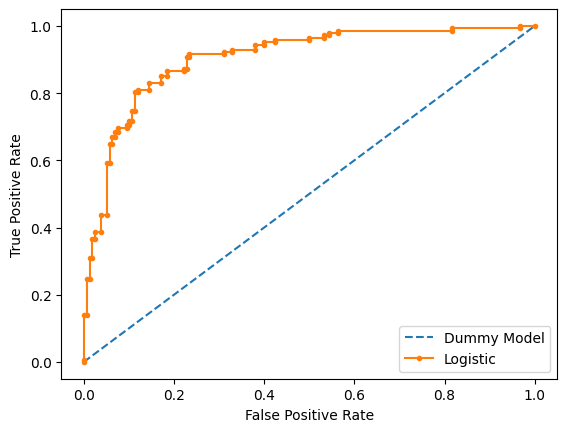

In [12]:
plt.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy Model")
plt.plot(model_fpr, model_tpr, marker=".", label="Logistic")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

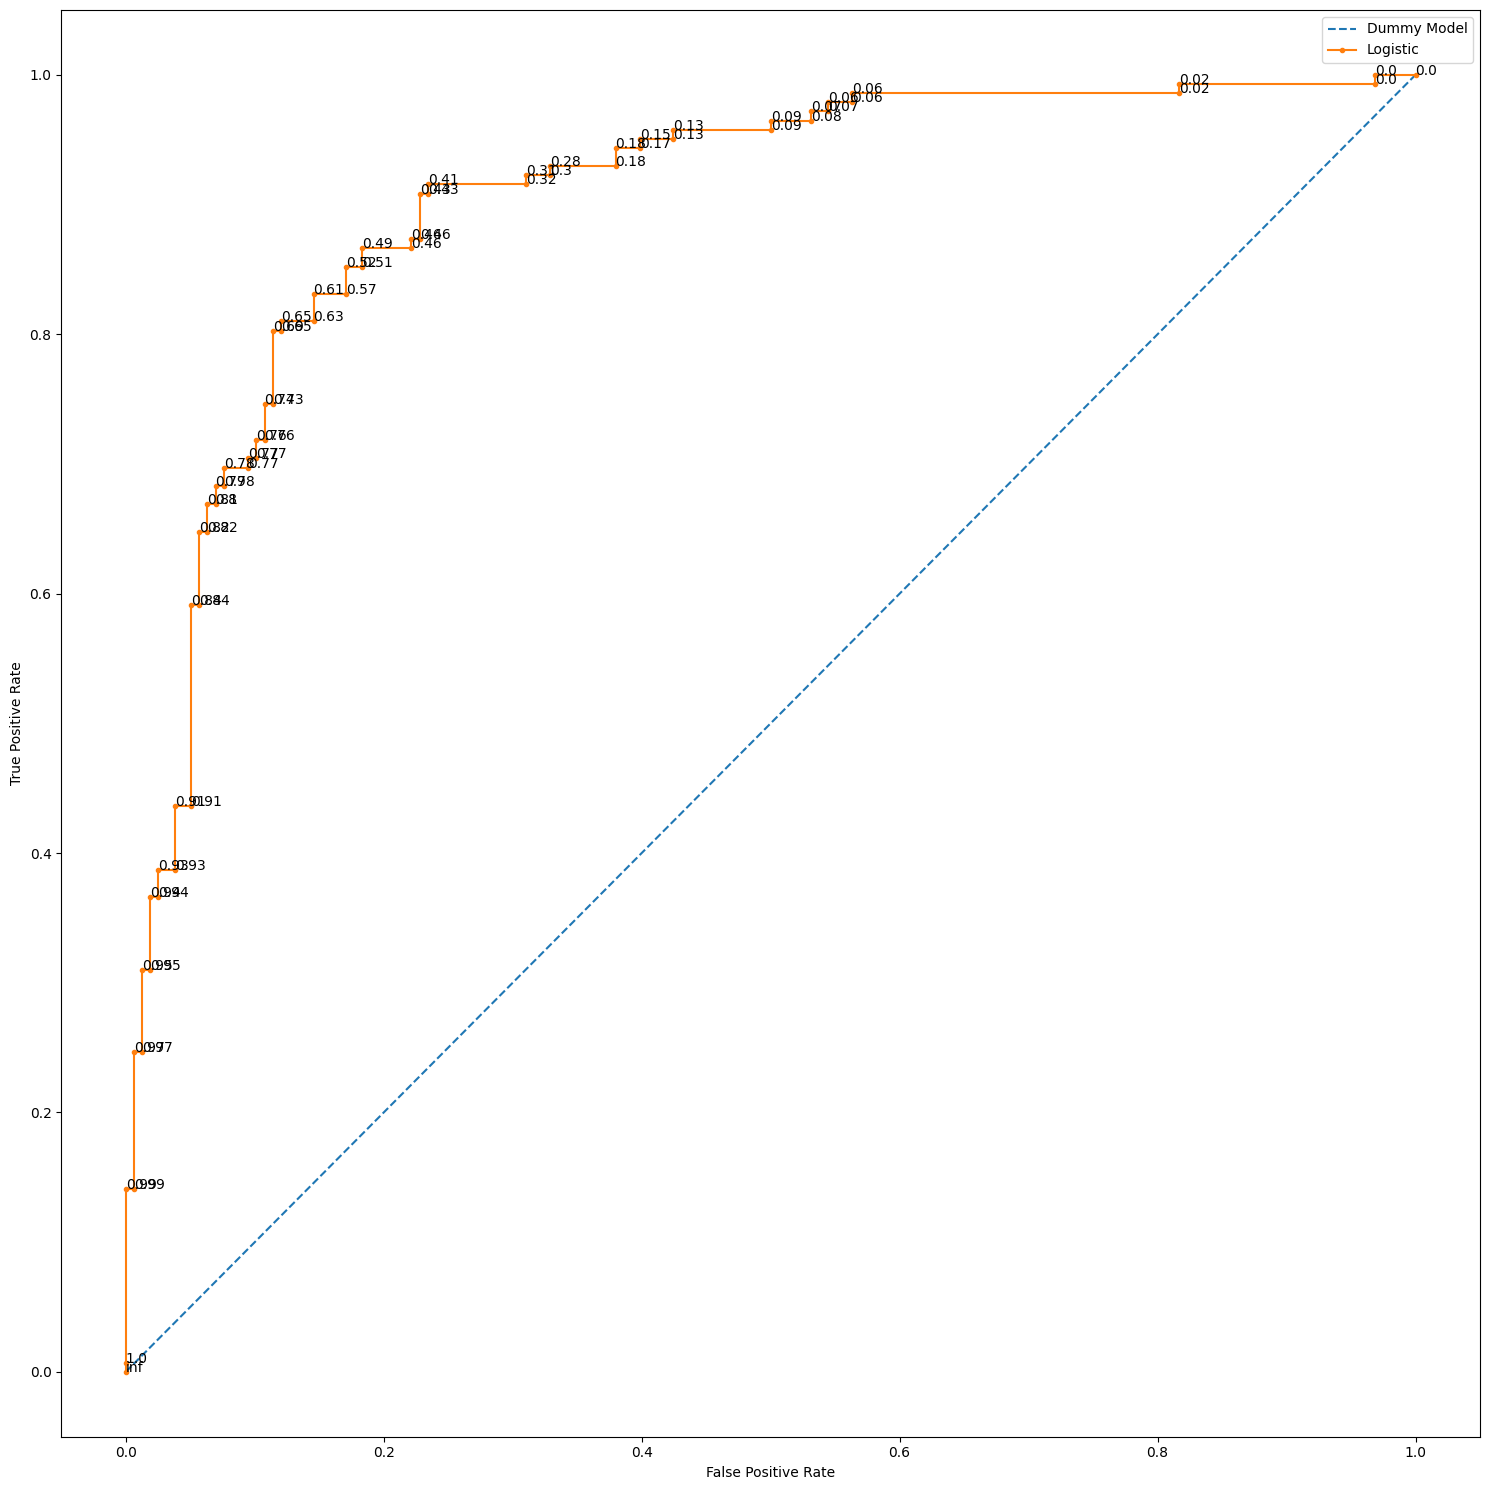

In [13]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)

ax.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy Model")
ax.plot(model_fpr, model_tpr, marker=".", label="Logistic")

for xyz in zip(model_fpr, model_tpr, thresholds):
    ax.annotate('%s' % np.round(xyz[2], 2), xy=(xyz[0], xyz[1]))

ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")

ax.legend()
plt.tight_layout()
plt.show()